# SVM - SPAM

## Data Description:

The dataset is taken from the UCI machine learning repository. Most features in the dataset represent count of certain words, denoted by names such as word_frequency_meeting, word_frequency_free etc. Some other features represent features typical of spam emails, such as the maximum length of 'all uppercase words' ('FREE OFFER'), the frequency of non-alphanumeric characters ('!!!!') etc.

## Step 1: Importing the required libraries:

In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [264]:
df = pd.read_csv('Spam.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [266]:
df.shape

(4601, 58)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [270]:
df.isnull().sum().any()

False

In [272]:
df.spam.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [274]:
100*df.spam.value_counts()[1]/len(df)

39.404477287546186

We have close to 40% of records that are labelled as spam.

__NOTE:__ <br>
SVM is sensitive to the scale of features. Since SVM relies on calculating distances between points (e.g., Euclidean distance), features on different scales can disproportionately affect the model.

### Splitting the data into train and test sets:

In [279]:
y = df.pop('spam')
X = df

In [281]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

In [283]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3220, 57)
(1381, 57)
(3220,)
(1381,)


### Scaling the variable using StandardScaler:

In [286]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Training and Evaluating the model:

1. __C__:<br>
- Meaning: Regularization parameter. A smaller value of C creates a larger margin but may misclassify more points, while a larger C aims to classify all training points correctly. It controls the trade-off between maximizing the margin and minimizing classification error.

2. __kernel__:

Type: str, default='rbf' <br>
- Meaning: Specifies the kernel type to be used. Common options include:
    - __```linear```__: Linear kernel - Represents a linear decision boundary. It’s efficient for large datasets with many features and is suitable when the data is linearly separable.
    - __```poly```__: Polynomial kernel - Can model non-linear relationships by transforming the input space into polynomial feature space. The degree of the polynomial controls the complexity of the decision boundary. __An additional Hyperparameter gets added here and thet is ```degree``` when we use polynomial kernel.
    - __```rbf```__: Radial basis function (Gaussian) kernel (default) -  A non-linear kernel that can handle complex decision boundaries. The 
__𝛾 or γ (gamma)__ parameter controls the influence of individual training points; smaller values lead to smoother boundaries, while larger values create more complex boundaries.
    - __```sigmoid```__: Sigmoid kernel - imilar to a neural network activation function. It can be used in cases where data can be approximated as a hyperbolic tangent function, but it’s less commonly used compared to other kernels.
    

In [290]:
svc = SVC(C=1) # C: trade-off between maximizing the marginal distance and minimizing the classification error

svc.fit(Xtrain, ytrain)
ypred_train = svc.predict(Xtrain)
ypred_test = svc.predict(Xtest)

#### Evaluating the performance of the model:

In [292]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       804
           1       0.95      0.89      0.92       577

    accuracy                           0.93      1381
   macro avg       0.94      0.93      0.93      1381
weighted avg       0.94      0.93      0.93      1381



In [293]:
print(f"Train Accuracy: {round(accuracy_score(ytrain, ypred_train), 2)}.")
print(f"Test Accuracy: {round(accuracy_score(ytest, ypred_test), 2)}.")

print(f"Sensitivity/tpr/Recall: {round(recall_score(ytest, ypred_test), 2)}.")
print(f"Precision/ppv: {round(precision_score(ytest, ypred_test), 2)}.")

Train Accuracy: 0.94.
Test Accuracy: 0.93.
Sensitivity/tpr/Recall: 0.89.
Precision/ppv: 0.95.


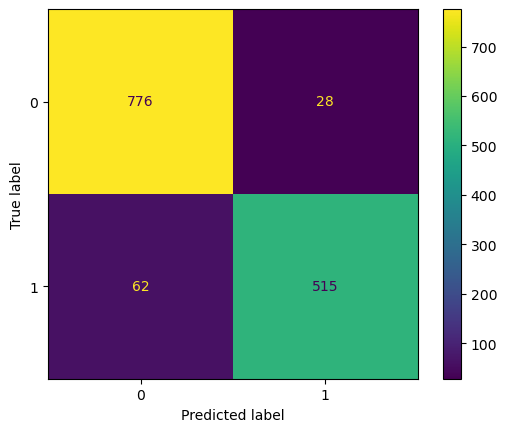

In [294]:
cm = metrics.confusion_matrix(ytest, ypred_test)
ConfusionMatrixDisplay(cm).plot()

In [295]:
TN, TP, FN, FP = cm[0,0], cm[1,1], cm[1,0], cm[0,1]

In [296]:
specificity = round(TN/(TN+FP), 3)
specificity

0.965

In [297]:
print(f"Train Accuracy: {round(accuracy_score(ytrain, ypred_train), 3)}.")
print(f"Test Accuracy: {round(accuracy_score(ytest, ypred_test), 3)}.")
print('\n')
print(f"Sensitivity/tpr/Recall: {round(recall_score(ytest, ypred_test), 3)}.")
print(f"Specificity/tnr: {specificity}")
print(f"Precision/ppv: {round(precision_score(ytest, ypred_test), 3)}.")

Train Accuracy: 0.942.
Test Accuracy: 0.935.


Sensitivity/tpr/Recall: 0.893.
Specificity/tnr: 0.965
Precision/ppv: 0.948.


The SVM we have built so far gives decently good results - an accuracy of 93.5%, sensitivity/recall (TNR) of 89.3%.


We don't want a genuine/ham email(0) to be predicted as spam(1) by our model.

So we are concerned about False Positives and wherefore we can focus on increasing the **Precision** and **Specificity**.

## Hyperparameter Tuning:

### K-Fold Cross Validation:

Let's first run a simple k-fold cv to get a sense of average metric as compared over multiple folds.

In [305]:
# instantiating a model with cost=1
model_1= SVC(C=1)

# creating a KFold object with 5 splits 
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric
cv_results = cross_val_score(estimator=model_1, X=Xtrain, y=ytrain, scoring='accuracy', n_jobs=-1)

print(f"CV Results: {cv_results}")
print(f"Mean Accuracy Score: {cv_results.mean()}")

CV Results: [0.91770186 0.92546584 0.92701863 0.93167702 0.92857143]
Mean Accuracy Score: 0.9260869565217391


### Grid Search to Find Optimal Hyperparameter C:

K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have.
uutut we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the GridSearchCV() method, which computes metrics (such as accuracy, recall etc.)

In this case, we have only one hyperparameter, thowe you can have multiple, such as C and gamma in non-linear SVMs. In that cawe you need to search through a grid of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.


In [307]:
model_2 = SVC()

param = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100]}

gridsearchCV = GridSearchCV(estimator=model_2,
                            param_grid=param,
                            cv=5,
                            scoring='accuracy',
                            return_train_score=True, 
                            n_jobs=-1, 
                            verbose=1)

gridsearchCV.fit(Xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [312]:
cv_results_df = pd.DataFrame(gridsearchCV.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.308258,0.028687,0.151135,0.006804,0.01,{'C': 0.01},0.624224,0.624224,0.621118,0.625776,...,0.623602,0.001584,10,0.624612,0.625388,0.625776,0.619565,0.625000,0.624068,0.002285
1,0.221695,0.016342,0.109986,0.010653,0.05,{'C': 0.05},0.881988,0.872671,0.878882,0.892857,...,0.882609,0.006846,9,0.889363,0.887422,0.885870,0.883540,0.883540,0.885947,0.002256
2,0.164395,0.021738,0.249703,0.315308,0.1,{'C': 0.1},0.891304,0.888199,0.900621,0.906832,...,0.897826,0.006972,8,0.906444,0.906832,0.901398,0.903727,0.905668,0.904814,0.002016
3,0.117107,0.024661,0.064522,0.005432,0.5,{'C': 0.5},0.913043,0.922360,0.933230,0.928571,...,0.922671,0.007505,5,0.940994,0.934783,0.935947,0.932453,0.934783,0.935792,0.002838
4,0.144892,0.018328,0.061593,0.003183,1,{'C': 1},0.917702,0.925466,0.927019,0.931677,...,0.926087,0.004669,2,0.945652,0.943323,0.942158,0.941382,0.941382,0.942780,0.001602
5,0.121842,0.015279,0.048364,0.005128,5,{'C': 5},0.919255,0.928571,0.919255,0.934783,...,0.927019,0.006661,1,0.960792,0.956910,0.962345,0.957686,0.956134,0.958773,0.002385
6,0.124366,0.015328,0.049667,0.002641,10,{'C': 10},0.922360,0.928571,0.916149,0.933230,...,0.926087,0.006102,2,0.967003,0.966615,0.969332,0.964286,0.963898,0.966227,0.001979
7,0.126406,0.010412,0.049389,0.002546,20,{'C': 20},0.922360,0.930124,0.911491,0.928571,...,0.924224,0.006903,4,0.978261,0.975155,0.977484,0.977096,0.972826,0.976165,0.001958
8,0.155060,0.017446,0.046672,0.000582,50,{'C': 50},0.913043,0.928571,0.917702,0.920807,...,0.921118,0.005503,6,0.984084,0.981366,0.984860,0.982531,0.982143,0.982997,0.001285
9,0.156967,0.018580,0.040161,0.004923,100,{'C': 100},0.905280,0.930124,0.919255,0.911491,...,0.918323,0.009033,7,0.988354,0.986025,0.988742,0.986801,0.986801,0.987345,0.001030


In [313]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [314]:
gridsearchCV.best_params_

{'C': 5}

We can see that the best value for C is 5 so let's build our SVC with a C value of 0.01.

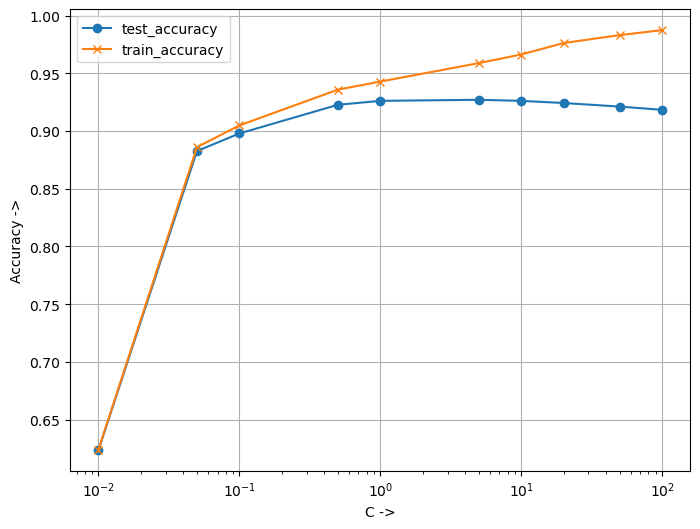

In [316]:
plt.figure(figsize=[8,6])

plt.plot(cv_results_df['param_C'], cv_results_df['mean_test_score'], marker='o')
plt.plot(cv_results_df['param_C'], cv_results_df['mean_train_score'], marker='x')

plt.xlabel('C ->')
plt.ylabel('Accuracy ->')

plt.legend(['test_accuracy', 'train_accuracy'], loc='upper left')

plt.xscale('log')
plt.grid()

Although the training accuracy monotonically increases with C, the test accuracy gradually starts reducing. 
- Thus, we can conclude that higher values of C tend to overfit the model. This is because a high C value aims to classify all training examples correctly (since C is the cost of misclassification - if we impose a high cost on the model, it will avoid misclassifying any points by overfitting the data).

### Now let's build the final SVC model with C=5:


In [319]:
gridsearchCV.best_params_

{'C': 5}

In [320]:
model_3 = SVC(C=5)

model_3.fit(Xtrain, ytrain)
ypred_train_3 = model_3.predict(Xtrain)
ypred_test_3 = model_3.predict(Xtest)

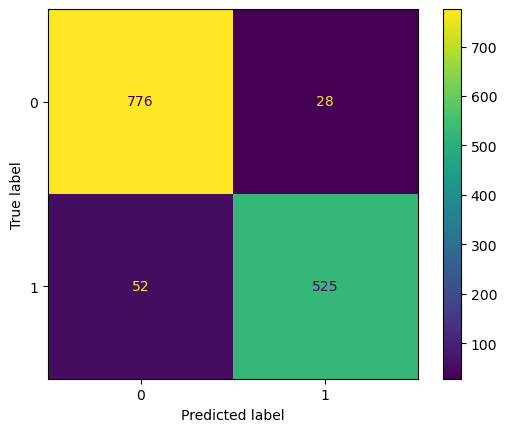

In [321]:
cm_3 = confusion_matrix(ytest, ypred_test_3)
ConfusionMatrixDisplay(cm_3).plot()

In [322]:
TN, TP, FN, FP = cm_3[0,0], cm_3[1,1], cm_3[1,0], cm_3[0,1]

specificity = round(TN/(TN+FP), 3)
specificity

0.965

In [323]:
print(f"Train Accuracy: {round(accuracy_score(ytrain, ypred_train_3), 3)}.")
print(f"Test Accuracy: {round(accuracy_score(ytest, ypred_test_3), 3)}.")
print('\n')
print(f"Sensitivity/tpr/Recall: {round(recall_score(ytest, ypred_test_3), 3)}.")
print(f"Specificity/tnr: {specificity}")
print(f"Precision/ppv: {round(precision_score(ytest, ypred_test_3), 3)}.")

Train Accuracy: 0.957.
Test Accuracy: 0.942.


Sensitivity/tpr/Recall: 0.91.
Specificity/tnr: 0.965
Precision/ppv: 0.949.


### Optimising for Other Evaluation Metrics:


In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, ifweu are concerned more about catching all spams (positives), you may want to maximise TPR or sensitivity/recall. If, on the other hand, you want to avoid classifying hams as spams (so that any important mails don't get into the spam box),weu would maximise the TN/Sspecificit or precisiony.

In [325]:
# specify params
params = {"C": [0.001, 0.005, 0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(Xtrain, ytrain)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.927639751552795 at C = {'C': 10}


# Tuning hyper-parameters for precision
 The highest precision score is 0.9367473261769874 at C = {'C': 0.1}


# Tuning hyper-parameters for recall
 The highest recall score is 0.885707570100412 at C = {'C': 10}




Thus, we can see that the optimal value of the hyperparameter varies significantly with the choice of evaluation metric.